# 1. Data Description (of players.csv)

## 1.1 Players.csv Variables

The players dataset includes 196 observations (i.e. 196 different players) and 7 variables. The variables and their names, types, and what they represent are shown in the table below:

|Variable Name|Data Type|Explanation|
|---|---|---|
|experience|character|Categorizes the player's experience with Minecraft|
|subscribe|logical|Is the player subscribed to a game-related newsletter?|
|hashedEmail|character|The email of the player, hashed to maintain privacy|
|played_hours|double|How many total hours the player has spent on the server|
|name|character|The name of the player|
|gender|character|The gender of the player|
|Age|double|The integer age of the player|

## 1.2 Summary Statistics

### Summary Statistics of Quantitative Variables in players.csv
| Variable | Mean |Standard Dev.|
|---|---|---|
|played_hours|5.85|28.36|
|Age|21.14|7.39|

## 1.3 Possible Issues in the Data

### 1.3.1 Visible Issues

The experience and gender columns may be automatically treated as a character datatype when we load it in. This might not be ideal for classification and visualization unless we converted them to factor datatypes.

### 1.3.2 Invisible Issues

There could be some NA values in the dataset that I'll have to ignore in order to calculate summary statistics properly. There is also the issue of whether to remove the NA values or to impute values such as the mean of the specific column containing the NA value. This could be due to participants not answering some of the questions asked. 

## 1.4 How the Data was Collected

The columns in the player data, other than the hours played, was collected by a survey. The survey was conducted upon signing up to participate in the study and to play on the Minecraft server. The hours played was tracked by the Minecraft server and the researchers conducting the study. 

# 2. Questions

### 2.1 Broad Question

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### 2.2 Specific Question

For each **type of player**, can the **age** and **hours played** of predict whether a given player **subscribes** to a game-related newsletter? 

### 2.3 How the Given Data Will Address the Specific Question/How I will Wrangle the Data

Player.csv will be used. The played_hours column and the age of each player will classify whether a player subscribe variable will be "TRUE" or "FALSE.” This will be done for every type of player, grouped by the experience column. To prepare the data for KNN classification and plotting, I will need to change the datatypes of the subscribe and experience columns to factor. 

# 3. Exploratory Data Analysis and Visualization

In [12]:
# load libraries
library(tidyverse)

## 3.1 Reading, Downloading, and Wrangling the Data

In [13]:
# download the data
download.file("https://raw.githubusercontent.com/gbdev133/dsci100_individual/refs/heads/main/players.csv", "players.csv")

In [14]:
# read the data
players <- read_csv("players.csv")
# display the head of the data
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [15]:
# wrangling
# change experience to a factor type
players <- mutate(players, experience = as_factor(experience))

## 3.2 Summary Statistics

In [16]:
averages <- summarize(players, played_hours = mean(played_hours), Age = mean(Age, na.rm = TRUE))
averages

sdevs <- summarize(players, played_hours = sd(played_hours), Age = sd(Age, na.rm = TRUE))
sdevs

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


played_hours,Age
<dbl>,<dbl>
28.35734,7.389687


### Average of each quantatative variable in players.csv
| Average Hours Played (hours) | Average Age (years) |
|---|---|
|5.845918|21.13918|

The average hours played was 5.85 hrs, and the average age was 21.14 years.

## 3.3 Visualizations

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_point()`).”


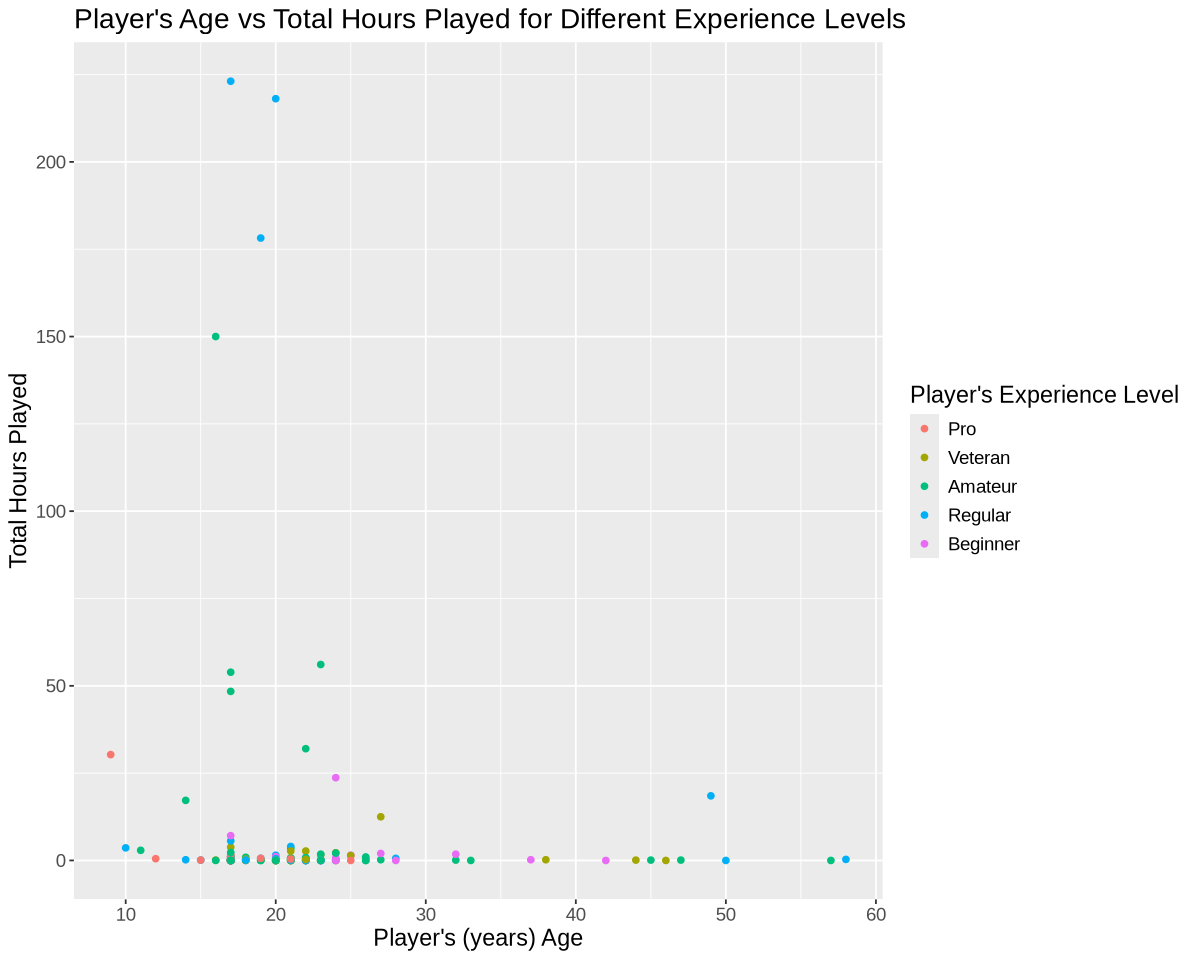

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


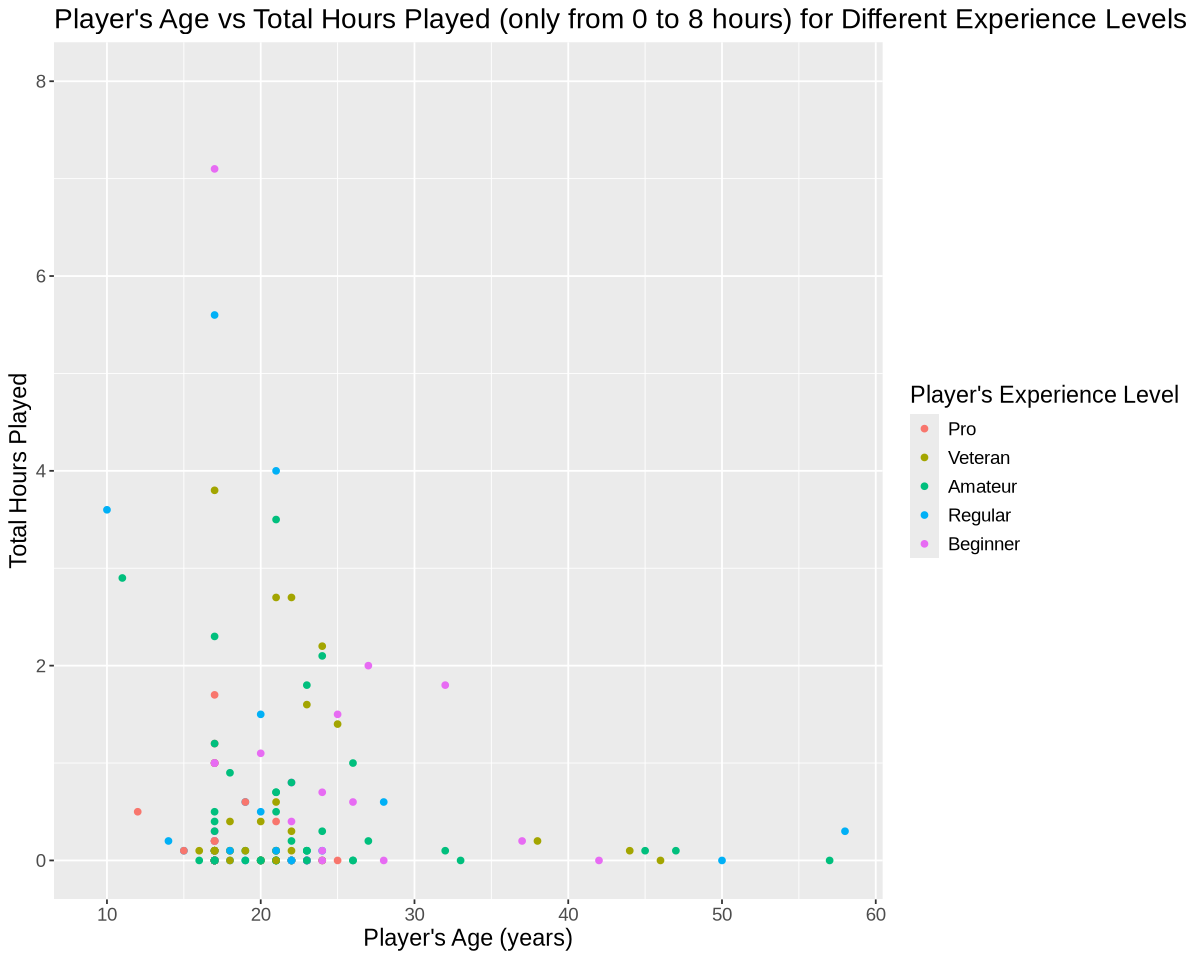

Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_point()`).”


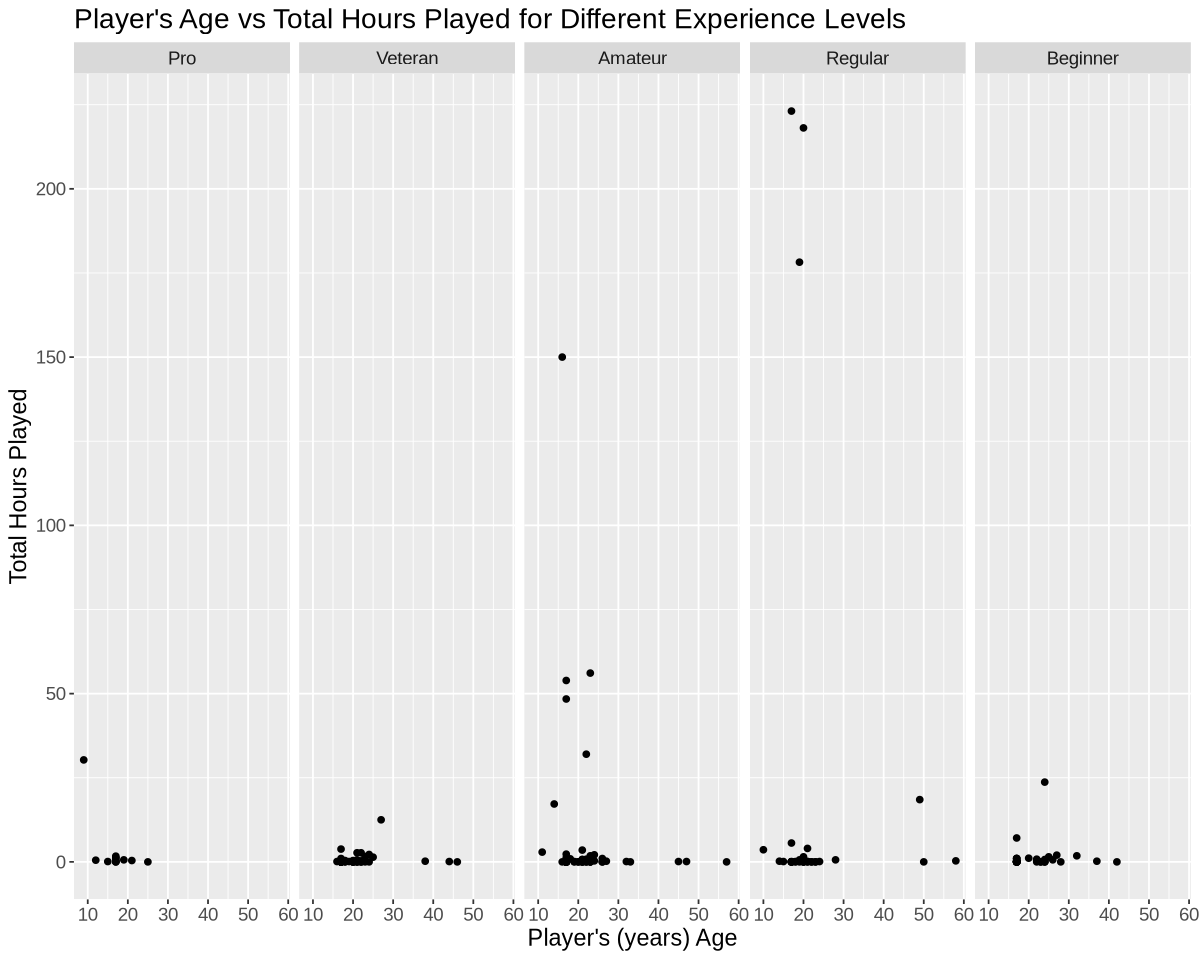

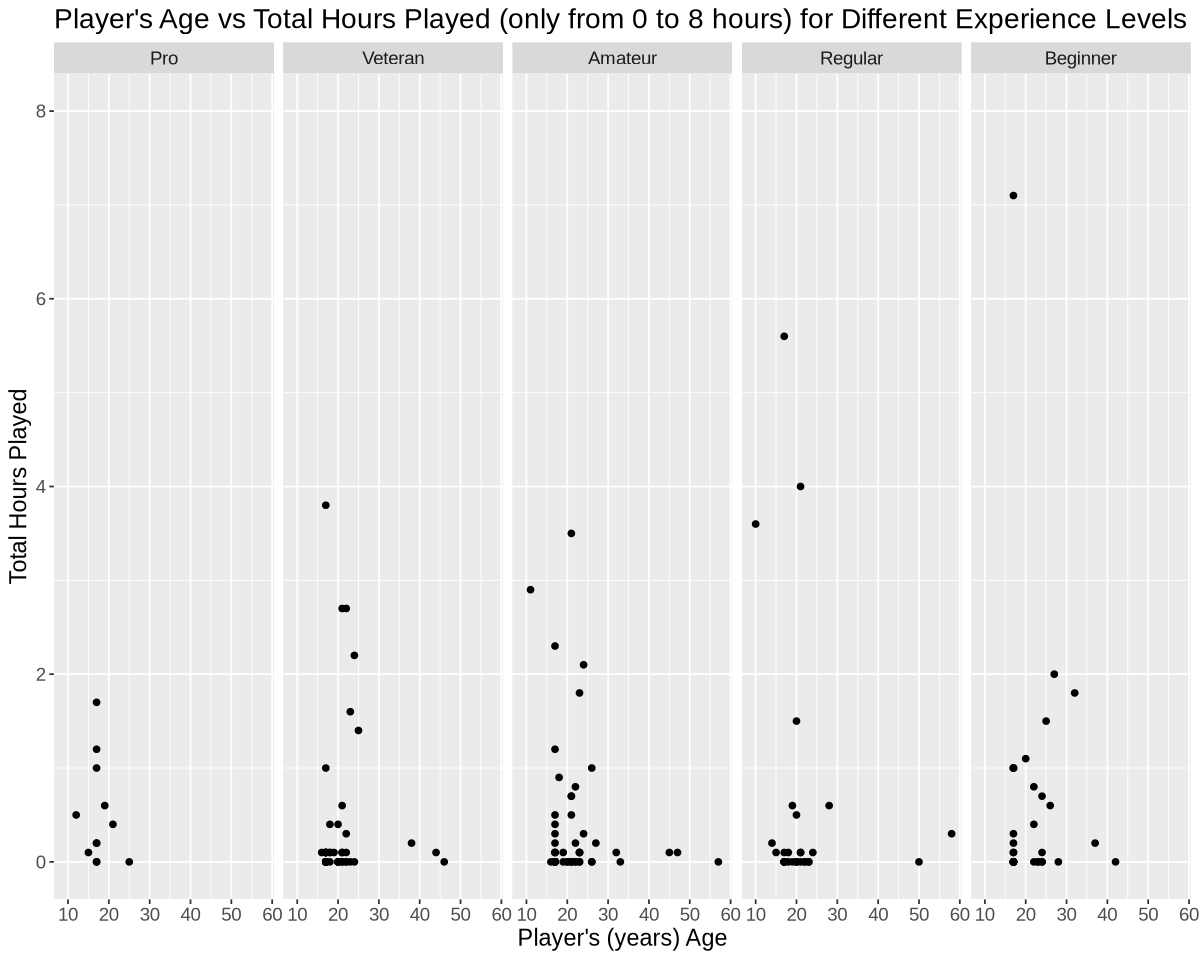

In [17]:
options(repr.plot.width = 10, repr.plot.height = 8)
# age vs played_hours
plot1 <- ggplot(players, aes(x = Age, y = played_hours, color = experience)) + 
    geom_point() + 
    theme(text = element_text(size = 14))

plot2 <- plot1 + 
    labs(x = "Player's Age (years)", y = "Total Hours Played", 
         title = "Player's Age vs Total Hours Played (only from 0 to 8 hours) for Different Experience Levels", 
        color = "Player's Experience Level") + 
    ylim(c(0, 8))

plot3 <- ggplot(players, aes(x = Age, y = played_hours)) + 
    geom_point() + 
    facet_grid(cols = vars(experience)) + 
    theme(text = element_text(size = 14))

plot4 <- plot3 + 
    labs(x = "Player's (years) Age", y = "Total Hours Played", 
         title = "Player's Age vs Total Hours Played (only from 0 to 8 hours) for Different Experience Levels") +
    ylim(c(0, 8))
plot1 + labs(x = "Player's (years) Age", y = "Total Hours Played", 
         title = "Player's Age vs Total Hours Played for Different Experience Levels", 
        color = "Player's Experience Level")
plot2
plot3 + labs(x = "Player's (years) Age", y = "Total Hours Played", 
         title = "Player's Age vs Total Hours Played for Different Experience Levels")
plot4

## 3.4 Insights

All plots did not show any trend between the types of players. The first plot showed a slight inverse relationship at the top, and a cluster of points near the bottom, showing that a large portion of players played very few hours, with some outliers. This could be problematic as standardizing the entire dataset would cause the points at the bottom to have a very small distance between each other. Log scale for the hours played may be a better choice for the analysis. The second plot, limiting the y-axis, more clearly shows the inverse relationship in the bottom cluster.

# 4. Methods and Plan

The data will be split into subsets, filtered by player experience. After standardizing the data, we will use KNN Classification to predict whether the “subscribe” column is TRUE or FALSE using the columns “played_hours” and “Age.” KNN Classification is appropriate in this scenario as we don’t have a huge dataset (only 196 observations), so we will have good performance. Results will be compared for each of the player types. Log scale will be used for the “played_hours” column to have better scaling. We will use cross-validation from K = 1 to 99 as 98 is half of the total observations; when more than half the data points are used, the predictions will always be the same. The training/testing split will be 70/30, and we will run 10-fold cross-validation. 10-fold cross-validation is chosen because choosing bigger numbers may be too computationally intensive, but retains relatively accurate evaluations.